In [3]:
#A small implementation with a small dataset from statsmodels.api. This implementation demonstrates how a Poisson type exponential family is used for non-negative valued target labels.
#Using the basic concept of GLM's, we are able to produce a canonical link between the linear predictor and the natural parameter.
#This dataset is based on number of executions based on numerical features of income, poverty, etc. and some binary features like the location being North or South, etc.

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
#Importing all the basic libraries and our dataset.
data = sm.datasets.cpunish.load_pandas().data
#Fetching the dataset in tabular form.
print(data.columns)
data.head()
#Fetching basic details about the dataset.

Index(['EXECUTIONS', 'INCOME', 'PERPOVERTY', 'PERBLACK', 'VC100k96', 'SOUTH',
       'DEGREE'],
      dtype='object')


,EXECUTIONS,INCOME,PERPOVERTY,PERBLACK,VC100k96,SOUTH,DEGREE
0,37.0,34453.0,16.7,12.2,644.0,1.0,0.16
1,9.0,41534.0,12.5,20.0,351.0,1.0,0.27
2,6.0,35802.0,10.6,11.2,591.0,0.0,0.21
3,4.0,26954.0,18.4,16.1,524.0,1.0,0.16
4,3.0,31468.0,14.8,25.9,565.0,1.0,0.19


In [4]:
X_raw = data[['INCOME', 'PERPOVERTY', 'PERBLACK', 'VC100k96', 'SOUTH', 'DEGREE']]
#Forming our input matrix.
Y = data[['EXECUTIONS']]
#Forming the output matrix.
print(X_raw.shape)
print(Y.shape)
#Verifying shapes and dimensionality.

(17, 6)
(17, 1)


In [5]:
one = np.ones((X_raw.shape[0], 1))
#Initialised identity column to be added to X matrix as a bias term.
scale = StandardScaler()
X_scaled = scale.fit_transform(X_raw)
#Scaling the matrix to values between 0 and 1.
X = np.hstack([one, X_scaled])
#Adding the bias term.
print(X.shape)
print(Y.shape)
#Verifying the shapes.

(17, 7)
(17, 1)


In [6]:
def grad(X, Y, Q):
    Z = np.exp(X @ Q)
    #We map the linear space to an exponential space, to be used for further operations.
    return X.T @ (Y - Z)
    #Returned the gradient

In [7]:
Q = np.zeros((X.shape[1], 1))
#Initialised the parameter matrix for prediction.
iters = 10000
alpha = 0.001
#Arbitrarily set hyperparameters.
i = 0
#Iterator set at 0.
log_likelihood = []
#Array to store the variable part of log-likelihood function.
while(i < iters):
    #Start loop.
    Q += alpha*grad(X, Y, Q)
    #Basic updation gradient ascent.
    nat_param = X @ Q
    #Recording eta.
    term_1 = Y.T @ nat_param
    term_2 = np.sum(np.exp(nat_param), axis = 0)
    #Recording the 2 terms needed to calculate the variable part of log_likelihood.
    log_likelihood_maximiser = term_1 - term_2
    log_likelihood.append(log_likelihood_maximiser)
    #Store the value in the array for further graphical plotting.
    i += 1
    #Moving on to next iteration.

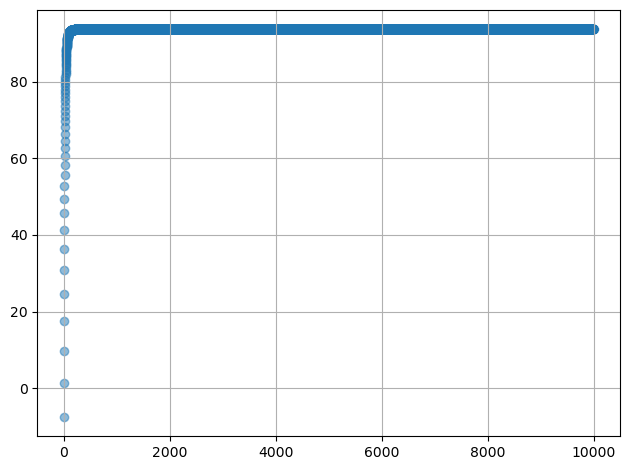

    EXECUTIONS
0         37.0
1          9.0
2          6.0
3          4.0
4          3.0
5          2.0
6          2.0
7          2.0
8          1.0
9          1.0
10         1.0
11         1.0
12         1.0
13         1.0
14         1.0
15         1.0
16         1.0
    EXECUTIONS
0    34.698315
1     8.793069
2     1.295353
3     3.911250
4     2.191863
5     0.983676
6     1.725276
7     2.318469
8     1.814337
9     2.625437
10    3.149755
11    3.745592
12    2.461598
13    0.799408
14    1.005415
15    0.526588
16    1.954601
0.7291982760770681


In [14]:
iterations = range(len(log_likelihood))
#Storing an iteration vector for plotting use.
plt.scatter(iterations, log_likelihood, alpha=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()
#Graph display.
eta = X @ Q
#Forming the canonical link.
preds = np.exp(eta)
#Using link to find expected value for each X_i.
print(Y)
print(mu_pred)
mean_rel_err = np.mean(np.abs(Y - preds) / np.abs(Y))
print(mean_rel_err)
#Comparison of 2 values.

# Overview
This is a standard implementation for GLM's using the "cpunish" dataset from statsmodels.api. Since our target value is no. of executions taken place, Y is distributed over a non-negative integer space. This means that we can assume that Y ~ Poisson($\lambda$), as our design choice for the GLM.
# Learnings, mistakes and doubts:
1. Having derived the log-likelihood function with canonical parameters, I had a doubt regarding why exactly is our design choice such that we always go for $\eta$ = $\u$? Is there any other way to describe this? This made me come upon the concept of link functions, an integral part of GLM's, previously unknown to me.
2. I tried applying the convexity test to a non-canonical link function that I had chosen, $g^{-1}(\eta) = \mu$ such that $\eta = \mu^{2}$. Upon further manipulation, we get $\lambda = \eta^{\frac{1}{2}}$, where $\lambda$ is the parameter for our Poisson distribution. Putting this in our log-likelihood function, the variable part becomes somewhat like this: $\sum_{i = 1}^m Y^{i} \ln(\lambda) - \lambda = \sum_{i = 1}^m Y^{i} \frac{1}{2}\ln(\eta) - \eta^{\frac{1}{2}} = \sum_{i = 1}^m Y^{i} \frac{1}{2}\ln(X^{i}\theta) - (X^{i}\theta)^{\frac{1}{2}}$. Using the convexity definition, we can prove that the function f($\theta$) = $\sum_{i = 1}^m Y^{i} \frac{1}{2}\ln(X^{i}\theta) - (X^{i}\theta)^{\frac{1}{2}}$ is non-convex. Thus, without testing even, we can say that gradient ascent will not work here.
3. Learned new pandas commands to see the headers and titles for a loaded dataset. This can be crucial in data interpretation.

Thank you for sticking around :)